<a href="https://colab.research.google.com/github/J3rmed/ai4eng_2025_2/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 942MB/s]


In [2]:
!unzip udea*.zip > /dev/null

In [3]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


In [24]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [26]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [28]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
top_10_programas = z['E_PRGM_ACADEMICO'].value_counts().nlargest(10).index
z_top10 = z[z['E_PRGM_ACADEMICO'].isin(top_10_programas)]
tabla = pd.crosstab(index=[z_top10['E_PRGM_ACADEMICO'], z_top10['F_TIENEINTERNET']],
                            columns=z_top10['RENDIMIENTO_GLOBAL'])
tabla = tabla[['bajo', 'medio-bajo', 'medio-alto', 'alto']]

tabla

RENDIMIENTO_GLOBAL                           bajo  medio-bajo  medio-alto  \
E_PRGM_ACADEMICO           F_TIENEINTERNET                                  
ADMINISTRACION DE EMPRESAS No                2361        1685        1023   
                           Si               12583       12400       11007   
ADMINISTRACIÓN DE EMPRESAS No                 847         610         320   
                           Si                7929        7379        4995   
CONTADURIA PUBLICA         No                2218        1920        1170   
                           Si                9542       10135        8493   
DERECHO                    No                1564        1396        1193   
                           Si                8893       10470       11916   
INGENIERIA CIVIL           No                 410         457         500   
                           Si                2145        3172        4577   
INGENIERIA DE SISTEMAS     No                 506         454         332   
                           Si                3167        3779        4135   
INGENIERIA INDUSTRIAL      No                 570         610         558   
                           Si                3999        5685        6934   
MEDICINA                   No                 168         219         258   
                           Si                1106        2109        3862   
PSICOLOGIA                 No                1084         819         547   
                           Si                6498        7345        7156   
PSICOLOGÍA                 No                 788         463         291   
                           Si                5410        4848        3428   

RENDIMIENTO_GLOBAL                           alto  
E_PRGM_ACADEMICO           F_TIENEINTERNET         
ADMINISTRACION DE EMPRESAS No                 432  
                           Si                8574  
ADMINISTRACIÓN DE EMPRESAS No                 101  
                           Si                1915  
CONTADURIA PUBLICA         No                 409  
                           Si                4433  
DERECHO                    No                 778  
                           Si               13981  
INGENIERIA CIVIL           No                 444  
                           Si                7187  
INGENIERIA DE SISTEMAS     No                 189  
                           Si                4108  
INGENIERIA INDUSTRIAL      No                 358  
                           Si                8823  
MEDICINA                   No                 296  
                           Si                9419  
PSICOLOGIA                 No                 298  
                           Si                6965  
PSICOLOGÍA                 No                  89  
                           Si                1503

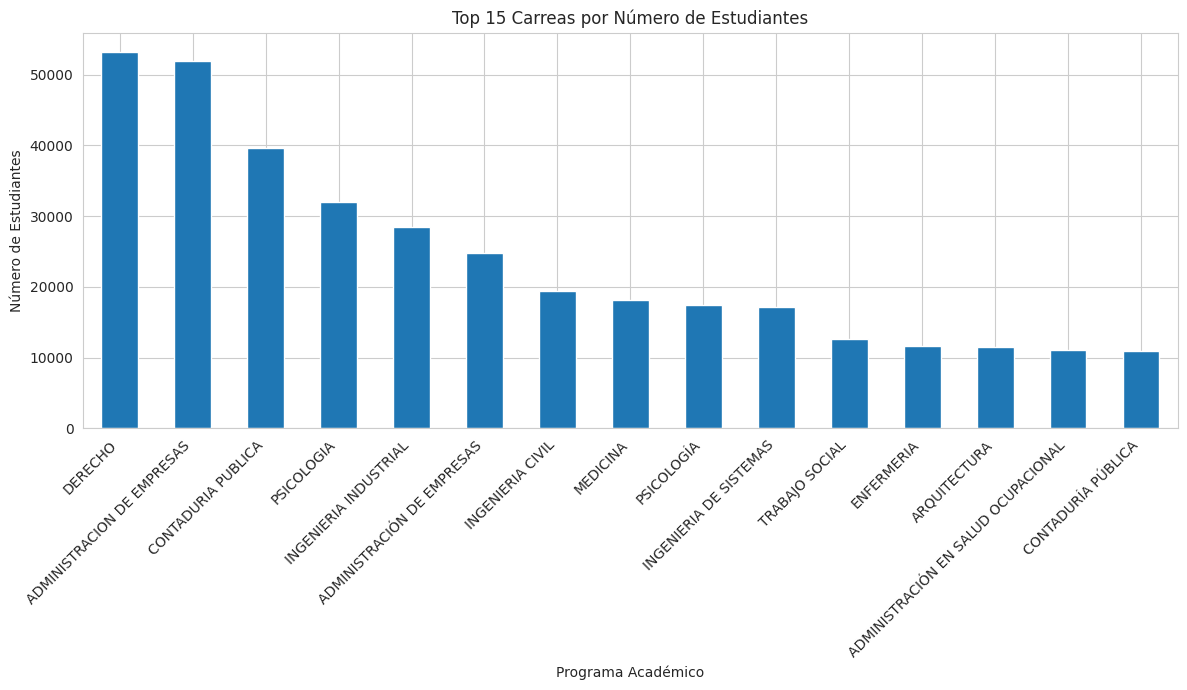

In [44]:
plt.figure(figsize=(12, 7))
z['E_PRGM_ACADEMICO'].value_counts().nlargest(15).plot(kind='bar')

plt.title('Top 15 Carreas por Número de Estudiantes')
plt.xlabel('Programa Académico')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()